In [2]:
import pandas as pd


file_path = r'C:\Users\sreej\OneDrive\Documents\Northeastern - Analytics\ALY 6020 Predictive Analysis\marketing_campaign.xlsx'

# Read the dataset into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to inspect its structure
df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
# Check for missing values
print(df.isnull().sum())



ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


True


<Axes: xlabel='Year_Birth'>

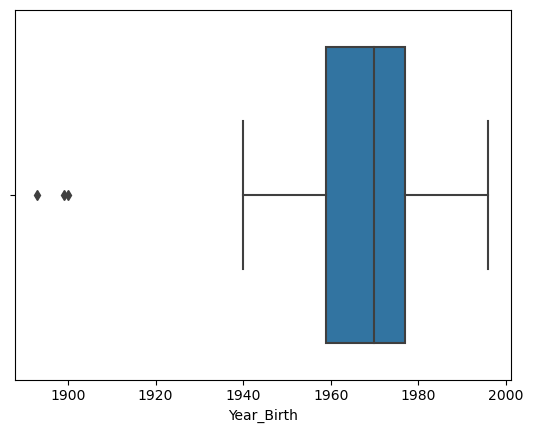

In [4]:
# Check for uniqueness of IDs
print(df['ID'].nunique() == len(df))

import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers in 'Year_Birth'
sns.boxplot(x=df['Year_Birth'])

In [5]:
# Check unique values and handle any inconsistencies
print(df['Education'].value_counts())

# Standardize education levels
df['Education'] = df['Education'].str.lower().str.strip()


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [6]:
# Check unique values and handle any inconsistencies
print(df['Marital_Status'].value_counts())

# Standardize marital status
df['Marital_Status'] = df['Marital_Status'].str.lower().str.strip()


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


<Axes: xlabel='Income'>

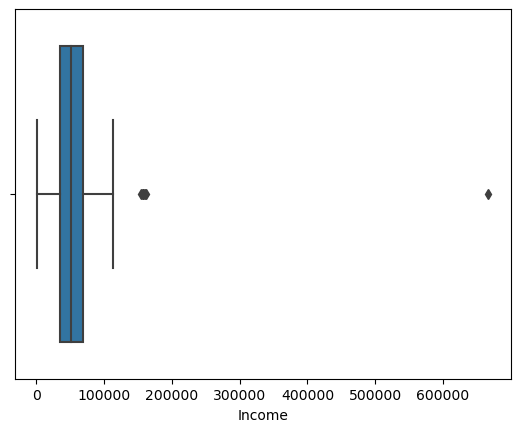

In [10]:
# Handle missing values in 'Income'
df['Income'].fillna(df['Income'].median(), inplace=True)

# Check for outliers in 'Income'
sns.boxplot(x=df['Income'])


In [7]:
# Check unique values
print(df['Kidhome'].value_counts())
print(df['Teenhome'].value_counts())


Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64


In [8]:
# Display the data types of each variable in the DataFrame
print(df.dtypes)


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


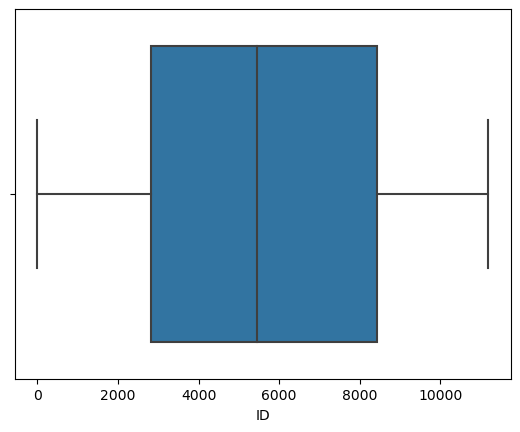

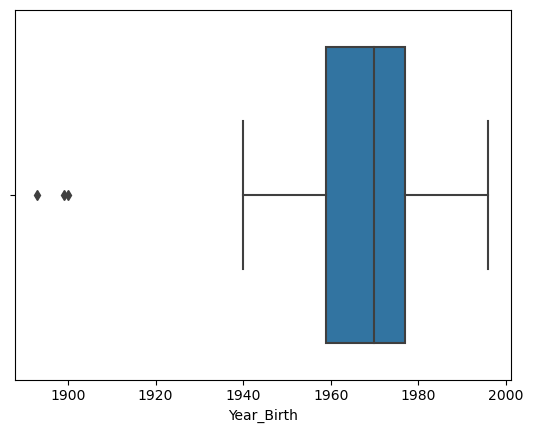

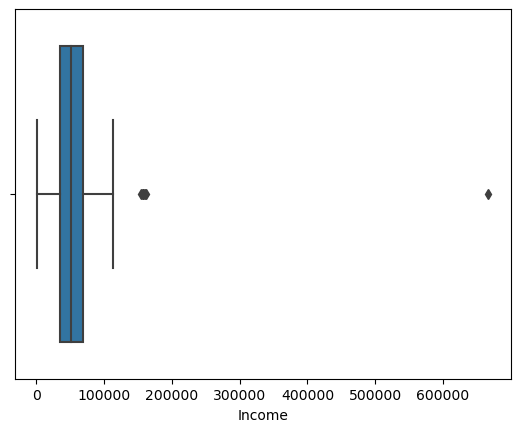

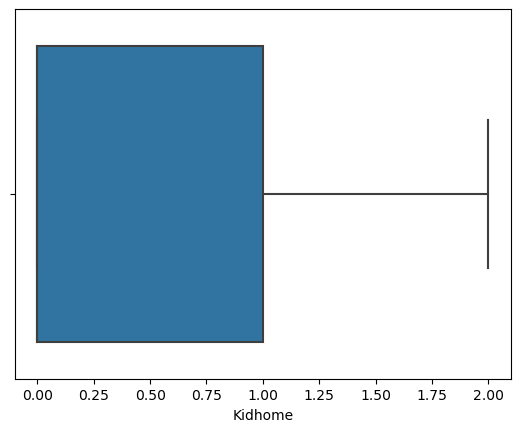

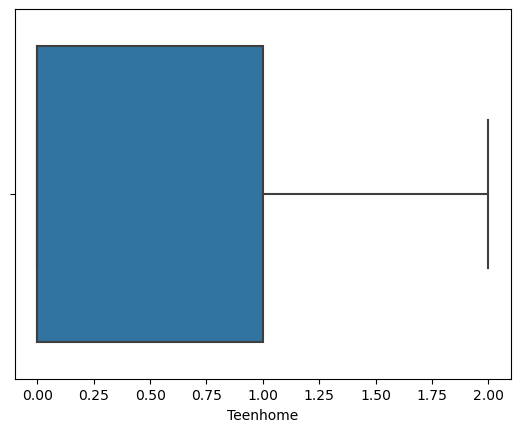

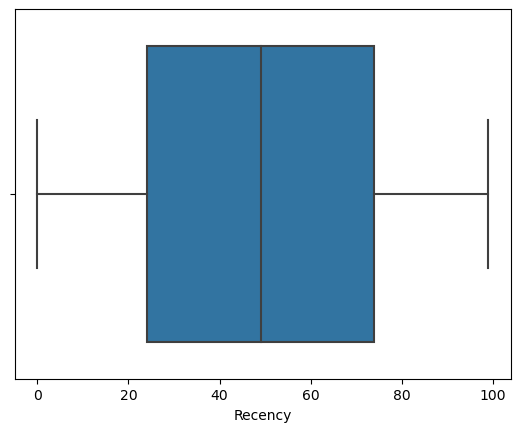

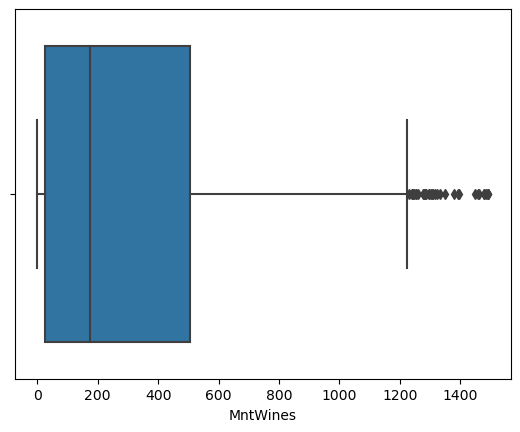

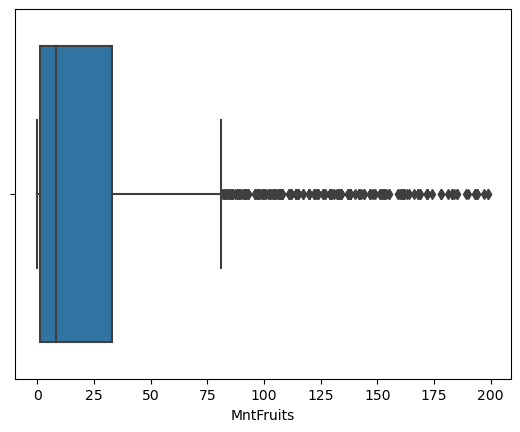

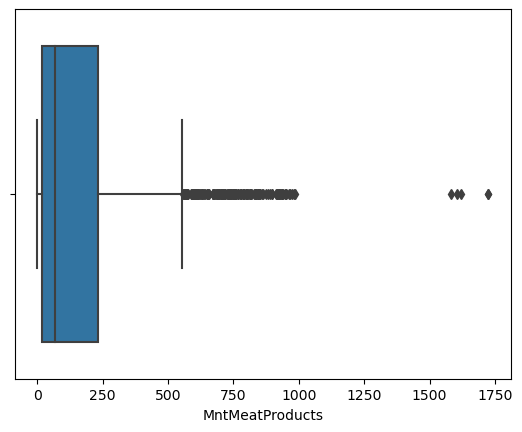

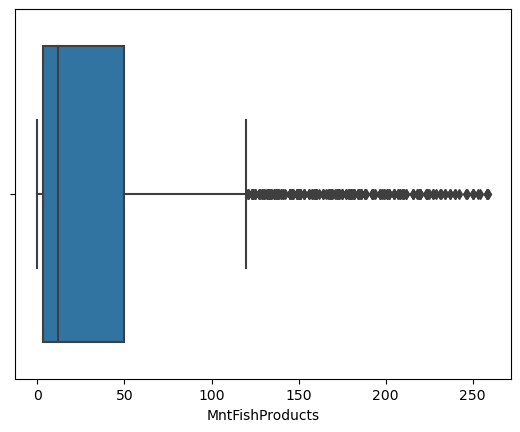

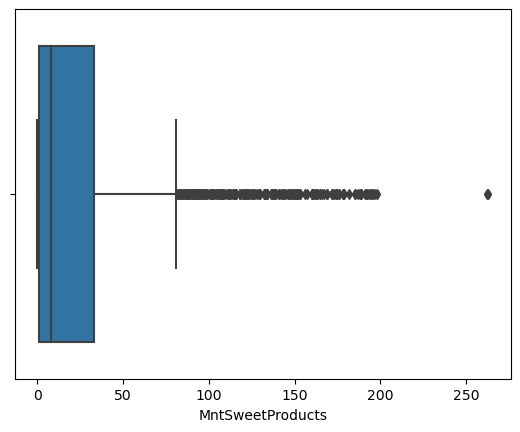

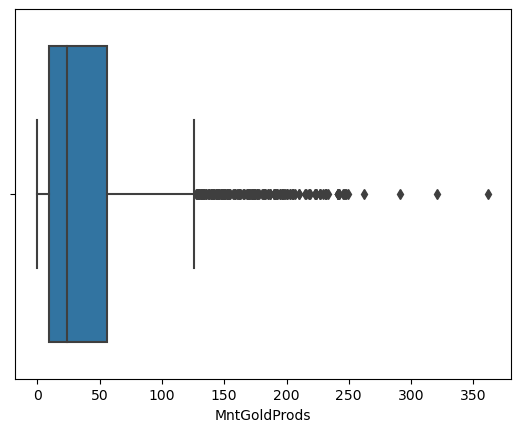

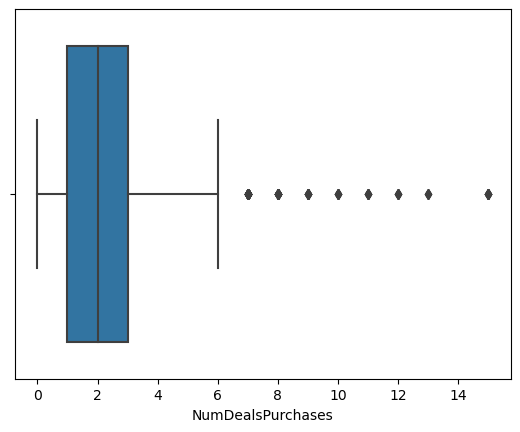

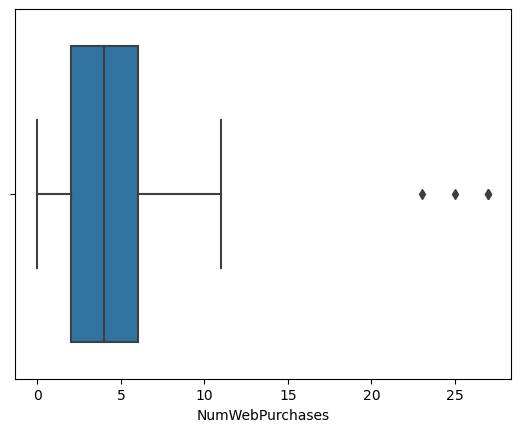

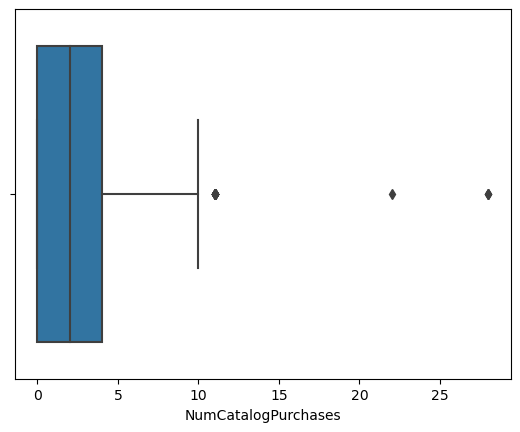

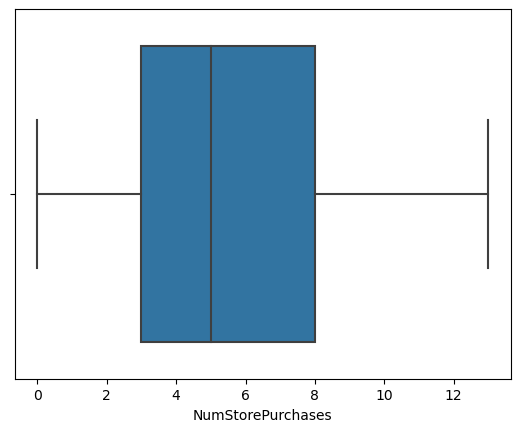

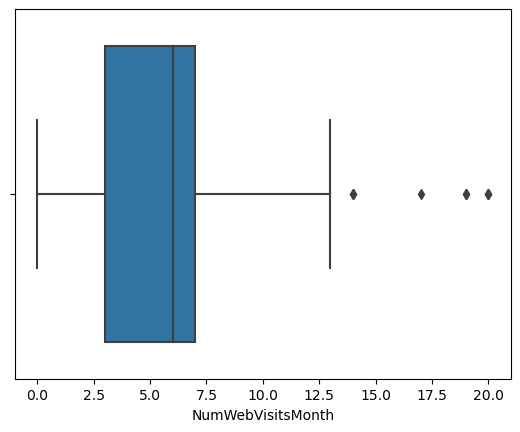

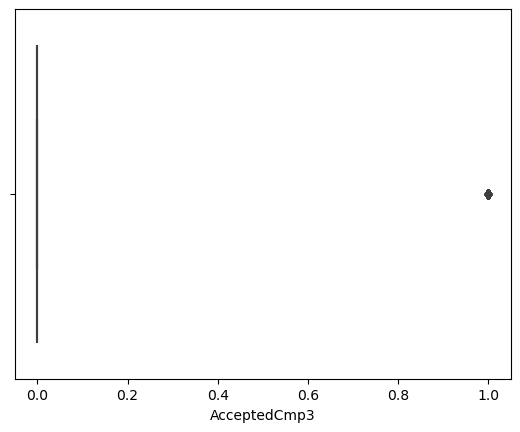

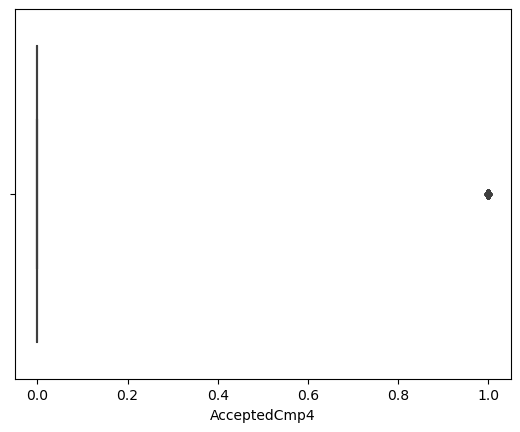

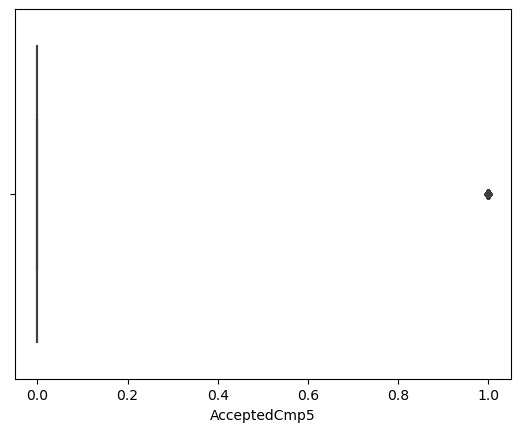

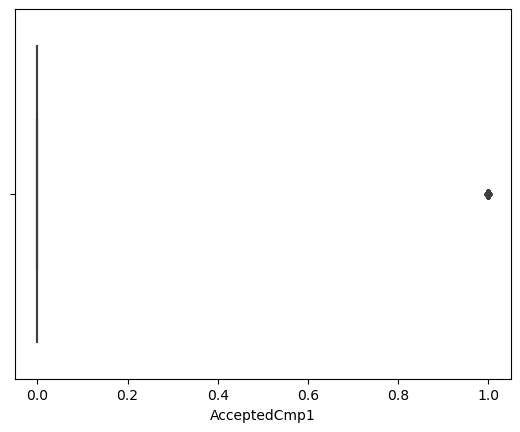

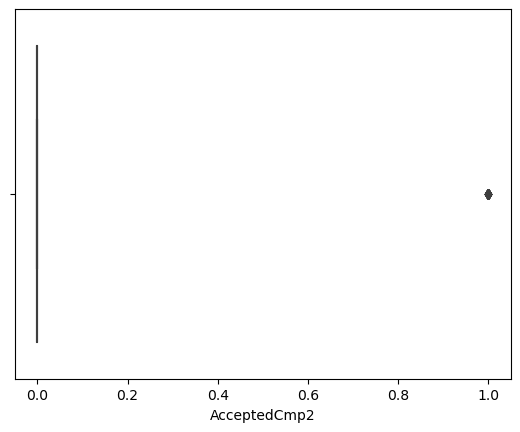

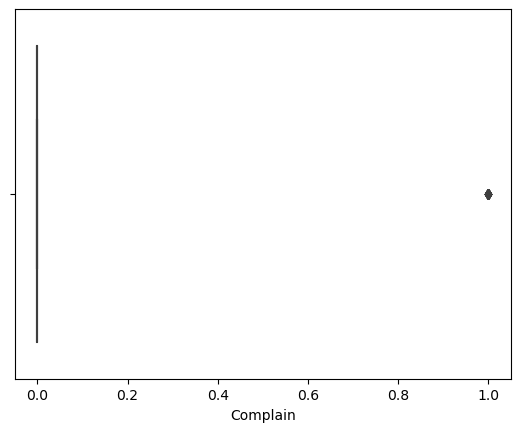

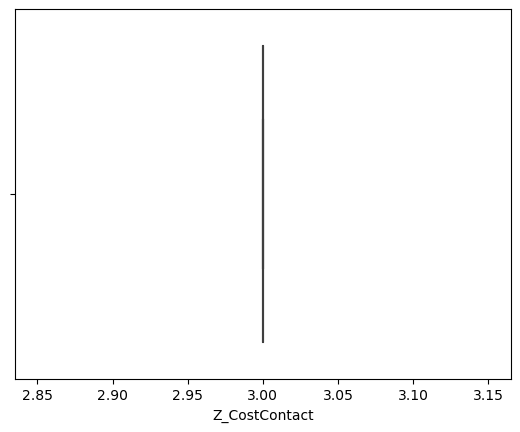

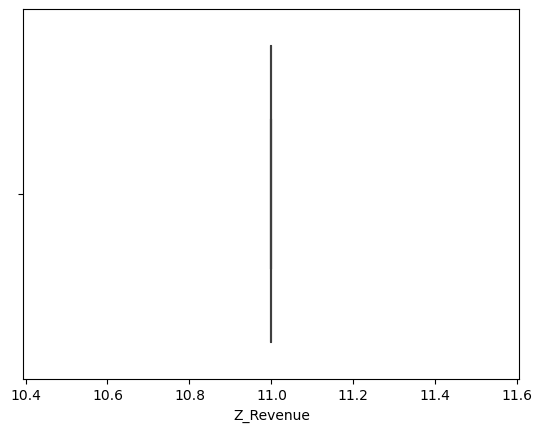

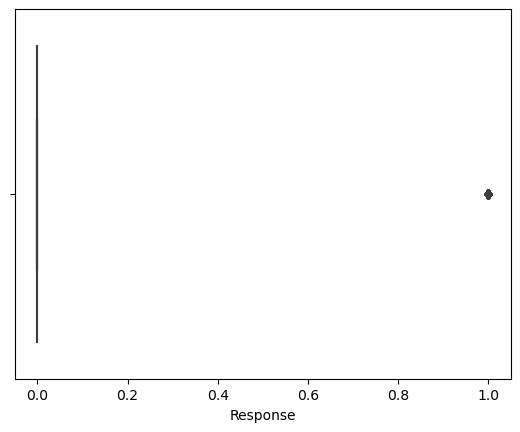

In [9]:
# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


# Check for outliers in numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.show()


In [20]:
# Check unique values
for col in ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']:
    print(df[col].value_counts())


AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64
AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64
AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64
Complain
0    2219
1      21
Name: count, dtype: int64
Z_CostContact
3    2240
Name: count, dtype: int64
Z_Revenue
11    2240
Name: count, dtype: int64


In [11]:
df = df[df['Income'] > 0]  #checking for any null values after cleaning 

# Handling Missing Values in 'Education' and 'Marital_Status'
# Assuming filling with the mode is reasonable for categorical variables
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)


# Handling Categorical Variable 'Education'
# Assuming 'Basic' and '2n Cycle' are equivalent, standardizing them to 'Basic'
df['Education'] = df['Education'].replace({'2n Cycle': 'Basic'})

# Handling Negative Values in 'NumDealsPurchases', 'NumWebPurchases', etc.
# Assuming these variables should not have negative values
negative_value_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df[negative_value_cols] = df[negative_value_cols].clip(lower=0)

# Handling Categorical Variable 'Marital_Status'
# Assuming 'Alone' and 'YOLO' are equivalent, standardizing them to 'Single'
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'YOLO': 'Single'})

In [12]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'graduation'

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  graduation         single  58138.0        0         0   
1  2174        1954  graduation         single  46344.0        1         1   
2  4141        1965  graduation       together  71613.0        0         0   
3  6182        1984  graduation       together  26646.0        1         0   
4  5324        1981         phd        married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [14]:
# Check unique values
print(df['Response'].value_counts())


Response
0    1883
1     333
Name: count, dtype: int64


In [15]:
# Check unique values
print(df['AcceptedCmp1'].value_counts())
print(df['AcceptedCmp2'].value_counts())
print(df['AcceptedCmp3'].value_counts())
print(df['AcceptedCmp4'].value_counts())
print(df['AcceptedCmp5'].value_counts())


AcceptedCmp1
0    2074
1     142
Name: count, dtype: int64
AcceptedCmp2
0    2186
1      30
Name: count, dtype: int64
AcceptedCmp3
0    2053
1     163
Name: count, dtype: int64
AcceptedCmp4
0    2052
1     164
Name: count, dtype: int64
AcceptedCmp5
0    2054
1     162
Name: count, dtype: int64


In [16]:
# Drop the 'AcceptedCmp1' to 'AcceptedCmp5' columns
df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1, inplace=True)




     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  graduation         single  58138.0        0         0   
1  2174        1954  graduation         single  46344.0        1         1   
2  4141        1965  graduation       together  71613.0        0         0   
3  6182        1984  graduation       together  26646.0        1         0   
4  5324        1981         phd        married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntGoldProds  NumDealsPurchases  \
0  2012-09-04       58       635  ...            88                  3   
1  2014-03-08       38        11  ...             6                  2   
2  2013-08-21       26       426  ...            42                  1   
3  2014-02-10       26        11  ...             5                  2   
4  2014-01-19       94       173  ...            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0    

In [17]:
# Check the updated dataset
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  graduation         single  58138.0        0         0   
1  2174        1954  graduation         single  46344.0        1         1   
2  4141        1965  graduation       together  71613.0        0         0   
3  6182        1984  graduation       together  26646.0        1         0   
4  5324        1981         phd        married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntGoldProds  NumDealsPurchases  \
0  2012-09-04       58       635  ...            88                  3   
1  2014-03-08       38        11  ...             6                  2   
2  2013-08-21       26       426  ...            42                  1   
3  2014-02-10       26        11  ...             5                  2   
4  2014-01-19       94       173  ...            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0    

In [ ]:
# Create a new column 'AmountSpentOnFood' by summing the relevant columns
df['AmountSpentOnFood'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']

# Drop the specified columns
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'], axis=1, inplace=True)



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
AmountSpentOnFood      0
dtype: int64


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  graduation         single  58138.0        0         0   
1  2174        1954  graduation         single  46344.0        1         1   
2  4141        1965  graduation       together  71613.0        0         0   
3  6182        1984  graduation       together  26646.0        1         0   
4  5324        1981         phd        married  58293.0        1         0   

  Dt_Customer  Recency  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  2012-09-04       58            88                  3                8   
1  2014-03-08       38             6                  2                1   
2  2013-08-21       26            42                  1                8   
3  2014-02-10       26             5                  2                2   
4  2014-01-19       94            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   
3                    0                  4                  6         0   
4                    3                  6                  5         0   

   Z_CostContact  Z_Revenue  Response  AmountSpentOnFood  
0              3         11         1               1529  
1              3         11         0                 21  
2              3         11         0                734  
3              3         11         0                 48  
4              3         11         0                407

In [24]:
df.drop_duplicates(inplace=True)

import datetime

df['Age'] = datetime.datetime.now().year - df['Year_Birth']


In [27]:
# Final check for missing values
print(df.isnull().sum())

# Display the first few rows of the cleaned dataset
df.head()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
AmountSpentOnFood      0
Age                    0
dtype: int64


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  graduation         single  58138.0        0         0   
1  2174        1954  graduation         single  46344.0        1         1   
2  4141        1965  graduation       together  71613.0        0         0   
3  6182        1984  graduation       together  26646.0        1         0   
4  5324        1981         phd        married  58293.0        1         0   

  Dt_Customer  Recency  MntGoldProds  ...  NumWebPurchases  \
0  2012-09-04       58            88  ...                8   
1  2014-03-08       38             6  ...                1   
2  2013-08-21       26            42  ...                8   
3  2014-02-10       26             5  ...                2   
4  2014-01-19       94            15  ...                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   
3                    0                  4                  6         0   
4                    3                  6                  5         0   

   Z_CostContact  Z_Revenue  Response  AmountSpentOnFood  Age  
0              3         11         1               1529   67  
1              3         11         0                 21   70  
2              3         11         0                734   59  
3              3         11         0                 48   40  
4              3         11         0                407   43  

[5 rows x 21 columns]

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   

                         Dt_Customer      Recency  MntGoldProds  \
count                           2216  2216.000000   2216.000000   
mean   2013-07-10 11:29:27.509025280    49.012635     43.965253   
min              2012-07-30 00:00:00     0.000000      0.000000   
25%              2013-01-16 00:00:00  

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


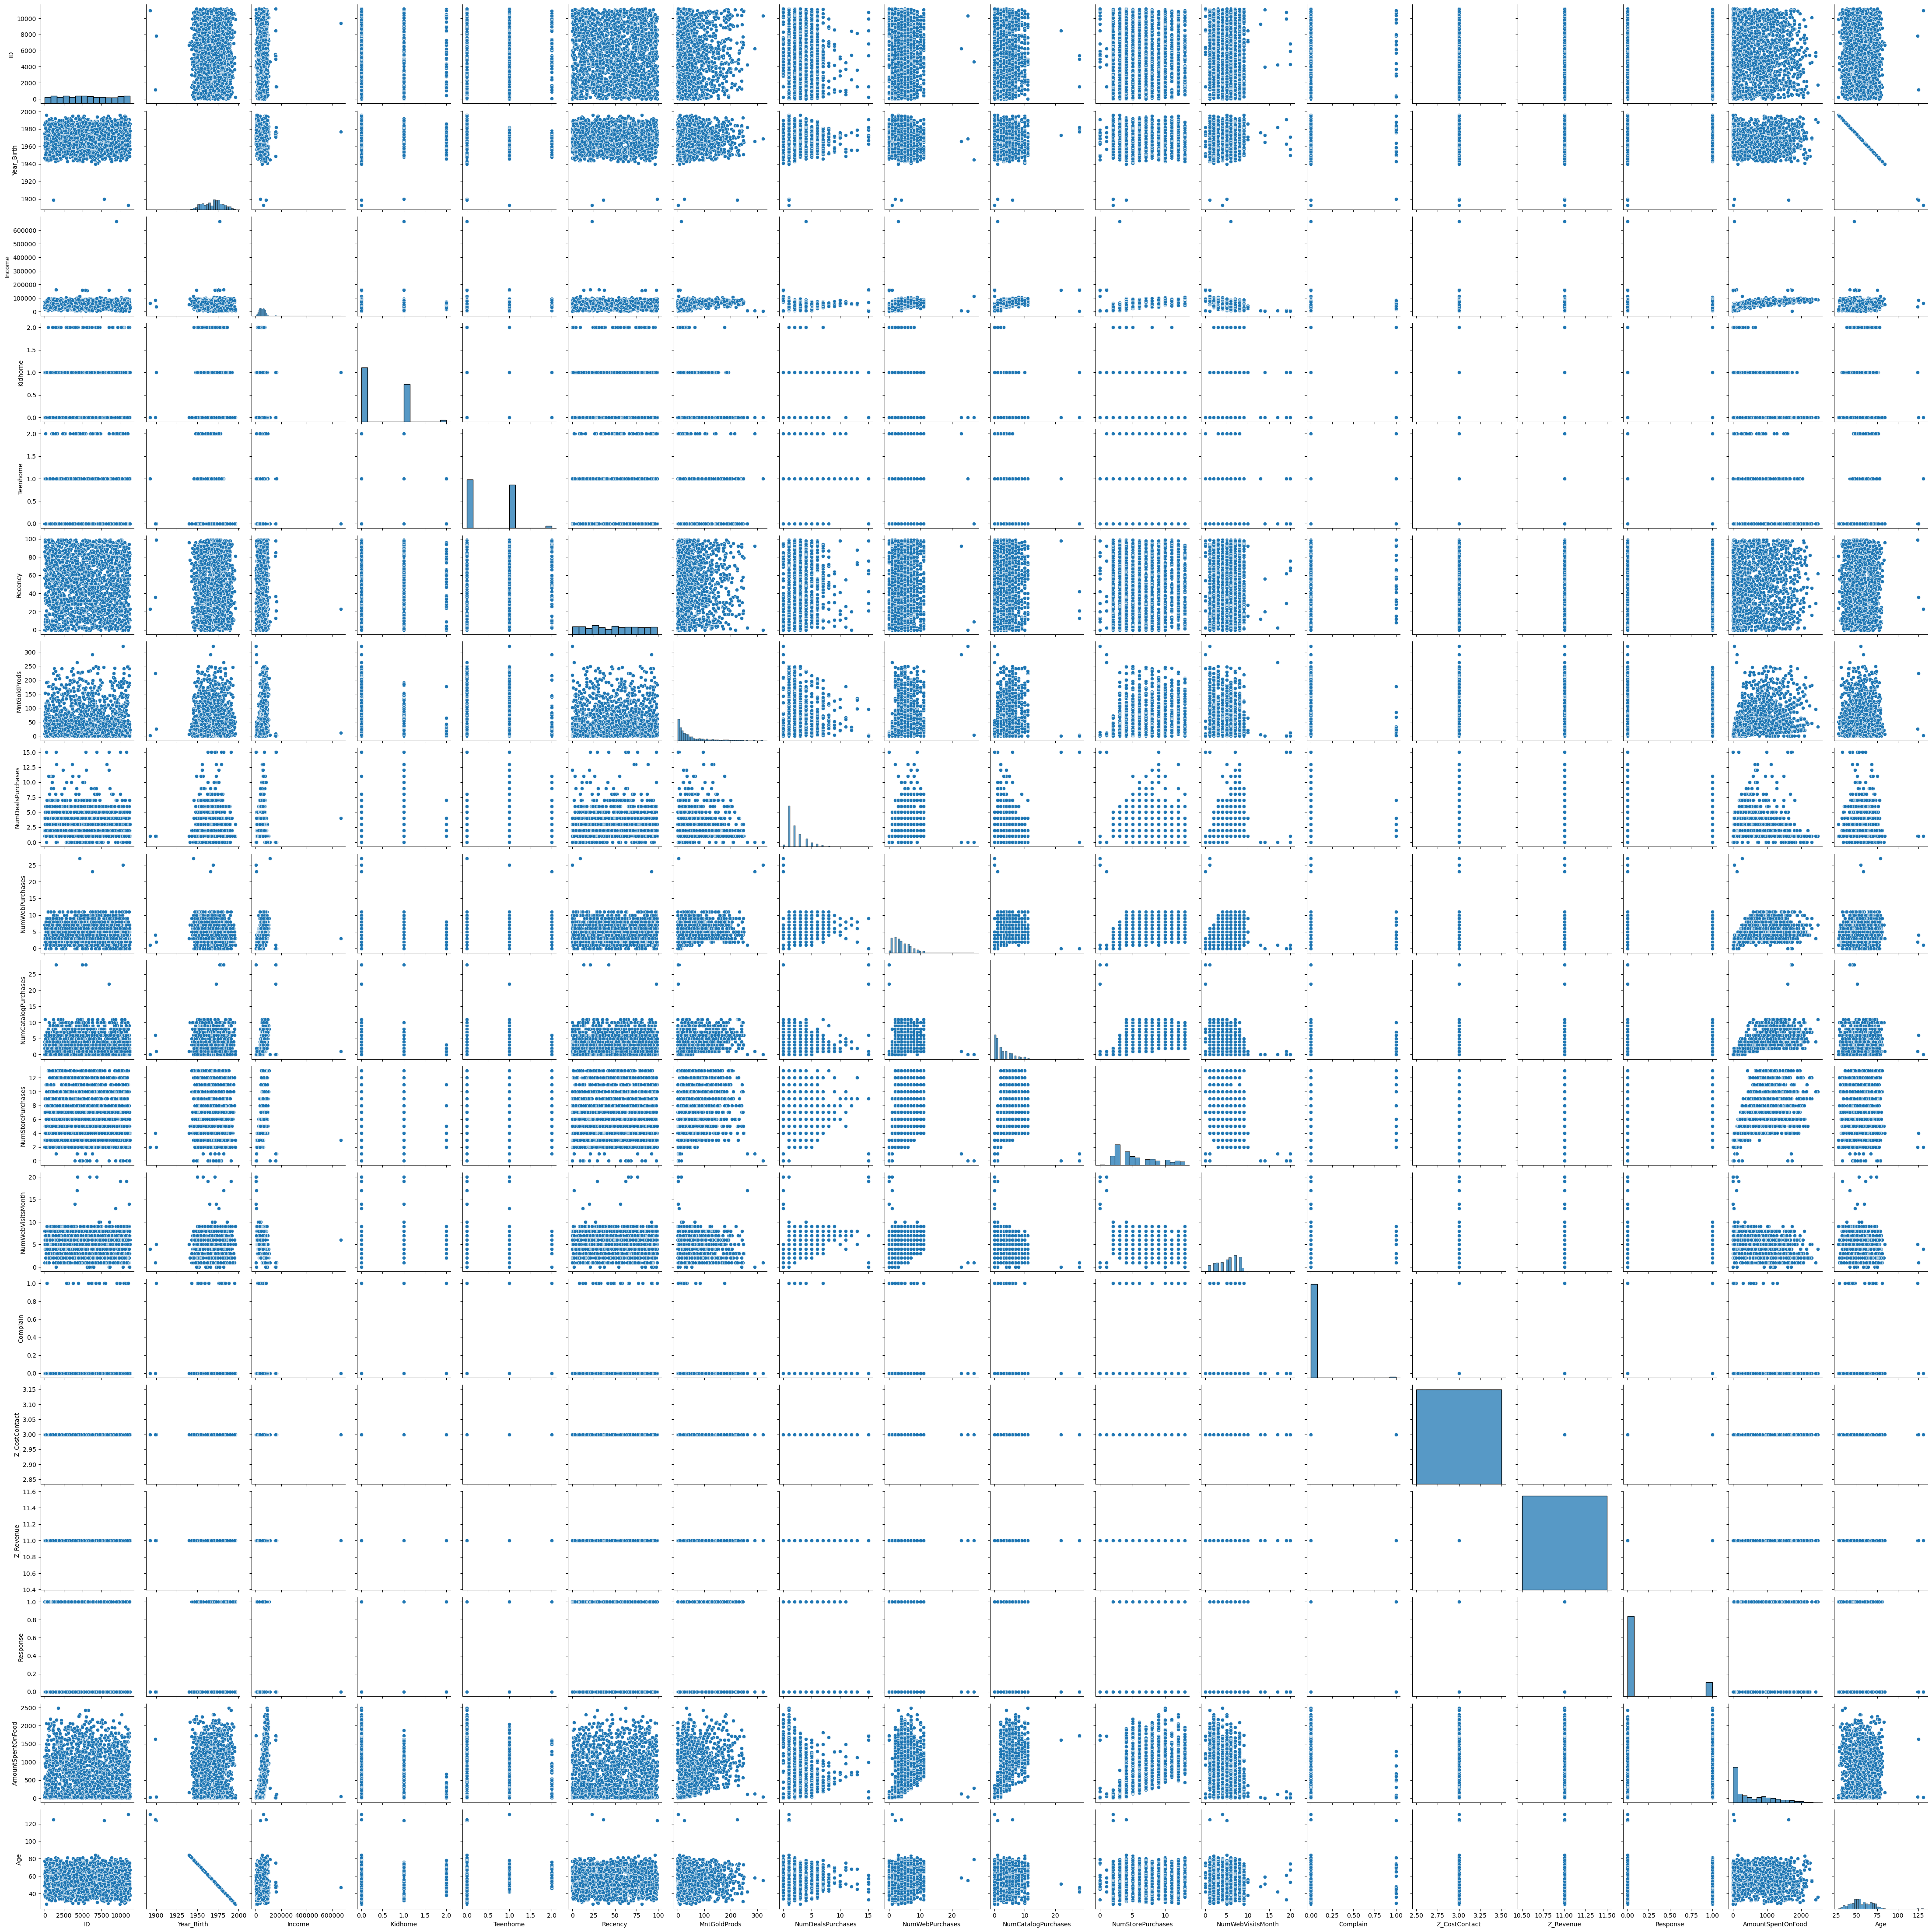

In [28]:
# Summary statistics
print(df.describe())

# Pairplot for numerical variables
sns.pairplot(df)
plt.show()

In [29]:
# Specify the path where you want to save the cleaned dataset
output_file_path = 'C:/Users/sreej/OneDrive/Documents/Northeastern - Analytics/ALY 6020 Predictive Analysis/module3cleaned_dataset.xlsx'

# Save the cleaned DataFrame to an Excel file
df.to_excel(output_file_path, index=False)

print(f"The cleaned dataset has been saved to: {output_file_path}")




The cleaned dataset has been saved to: C:/Users/sreej/OneDrive/Documents/Northeastern - Analytics/ALY 6020 Predictive Analysis/module3cleaned_dataset.xlsx


                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.002355  0.013095  0.001736 -0.003030   
Year_Birth           0.002355    1.000000 -0.161791  0.233615 -0.350791   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.001736    0.233615 -0.428669  1.000000 -0.039869   
Teenhome            -0.003030   -0.350791  0.019133 -0.039869  1.000000   
Recency             -0.044376   -0.016295 -0.003970  0.011492  0.013838   
MntGoldProds        -0.011172   -0.064208  0.325916 -0.355029 -0.019887   
NumDealsPurchases   -0.040612   -0.058668 -0.083101  0.216913  0.386246   
NumWebPurchases     -0.018476   -0.153051  0.387878 -0.371977  0.162077   
NumCatalogPurchases -0.002274   -0.121764  0.589162 -0.504501 -0.112692   
NumStorePurchases   -0.013070   -0.127891  0.529362 -0.501349  0.049737   
NumWebVisitsMonth   -0.007794    0.123904 -0.553088  0.447477  0.131240   
Complain             0.03

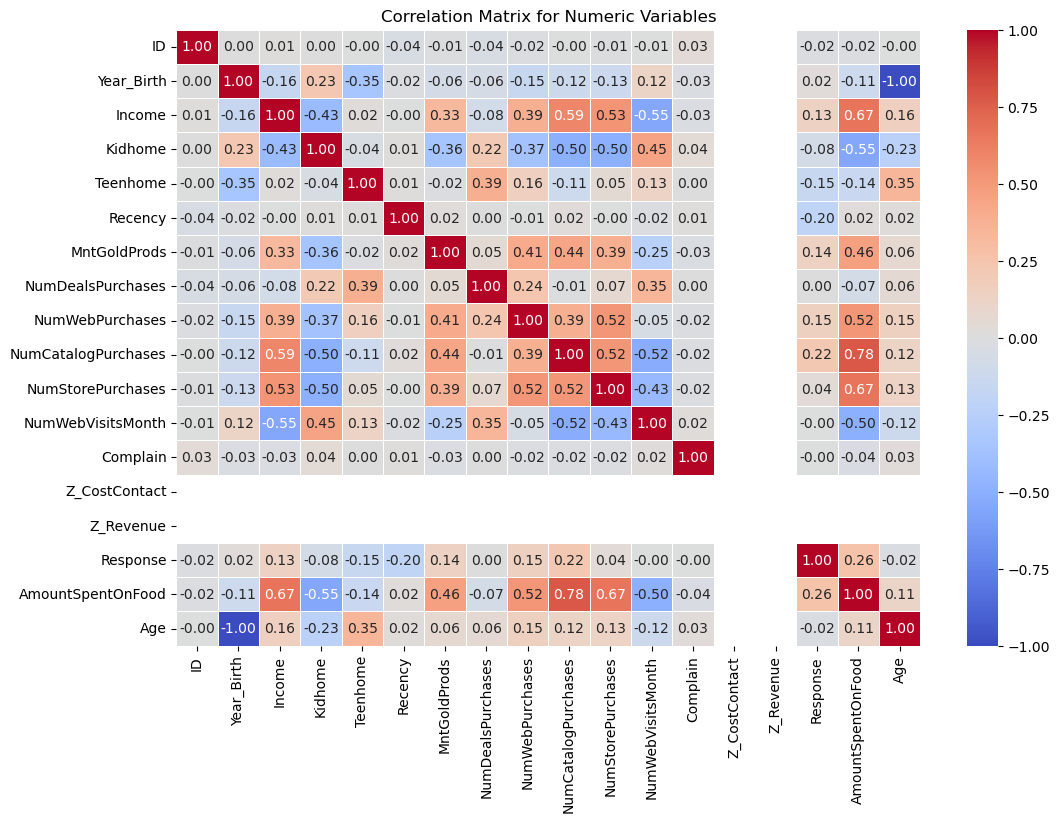

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_cols]

# Calculate the correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix for Numeric Variables")
plt.show()


                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.002355  0.013095  0.001736 -0.003030   
Year_Birth           0.002355    1.000000 -0.161791  0.233615 -0.350791   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.001736    0.233615 -0.428669  1.000000 -0.039869   
Teenhome            -0.003030   -0.350791  0.019133 -0.039869  1.000000   
Recency             -0.044376   -0.016295 -0.003970  0.011492  0.013838   
MntGoldProds        -0.011172   -0.064208  0.325916 -0.355029 -0.019887   
NumDealsPurchases   -0.040612   -0.058668 -0.083101  0.216913  0.386246   
NumWebPurchases     -0.018476   -0.153051  0.387878 -0.371977  0.162077   
NumCatalogPurchases -0.002274   -0.121764  0.589162 -0.504501 -0.112692   
NumStorePurchases   -0.013070   -0.127891  0.529362 -0.501349  0.049737   
NumWebVisitsMonth   -0.007794    0.123904 -0.553088  0.447477  0.131240   
Complain             0.03

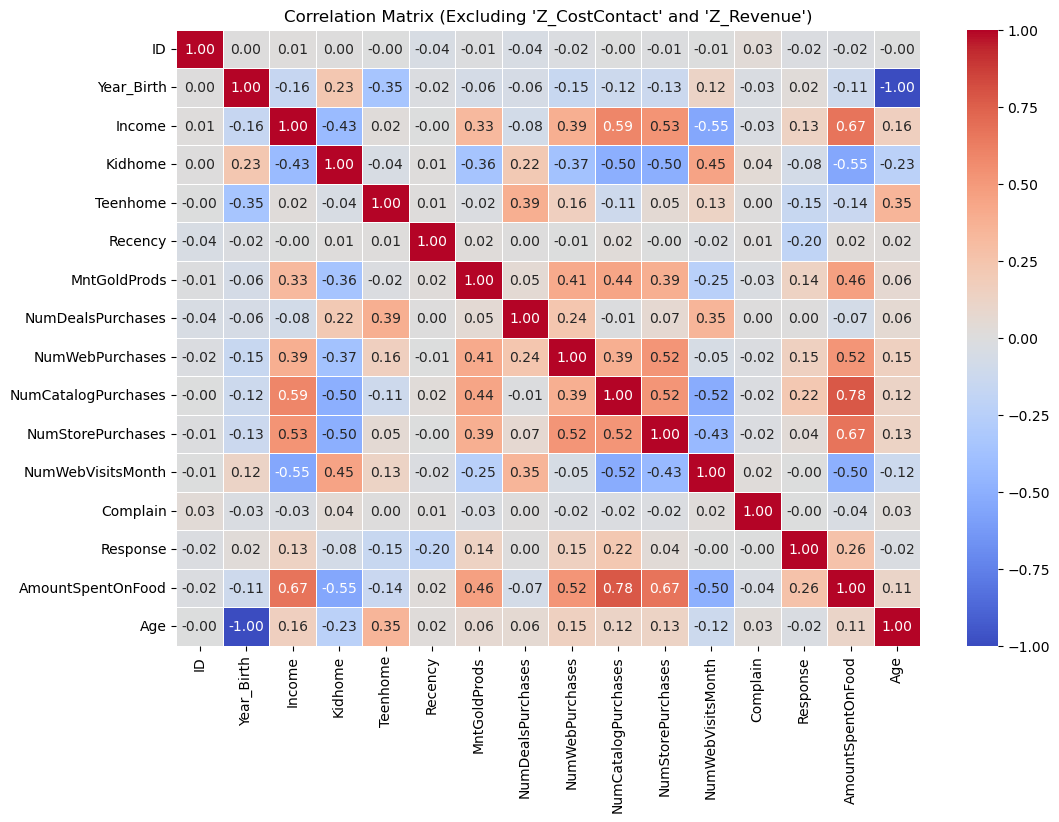

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Exclude 'Z_CostContact' and 'Z_Revenue' columns
df_filtered = df[numeric_columns].drop(['Z_CostContact', 'Z_Revenue'], axis=1)

# Calculate the correlation matrix
correlation_matrix_filtered = df_filtered.corr()

# Display the correlation matrix
print(correlation_matrix_filtered)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix (Excluding 'Z_CostContact' and 'Z_Revenue')")
plt.show()

In [88]:
#LOGISTIC MODEL
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

# Select relevant features and target variable
features = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'AmountSpentOnFood' ,'NumWebVisitsMonth','Complain','NumCatalogPurchases','NumWebPurchases']
target = 'Response'

# Create the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred1 = model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test1, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred1))

# Check the significance of variables using statsmodels
X_train_sm1 = sm.add_constant(X_train1)
logit_model = sm.Logit(y_train1, X_train_sm1)
result = logit_model.fit()
print(result.summary())


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       382
           1       0.46      0.19      0.27        62

    accuracy                           0.86       444
   macro avg       0.67      0.58      0.60       444
weighted avg       0.82      0.86      0.83       444

Confusion Matrix:
 [[368  14]
 [ 50  12]]
Optimization terminated successfully.
         Current function value: 0.345261
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1772
Model:                          Logit   Df Residuals:                     1761
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.1929
Time:                        13:40:31   Log-Likelihood:                -611.80
converged:      

In [89]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

# Select relevant features and target variable
features = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'AmountSpentOnFood','NumWebVisitsMonth','Complain','NumCatalogPurchases','NumWebPurchases']
target = 'Response'

# Create the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Check the significance of variables using statsmodels
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       382
           1       0.46      0.19      0.27        62

    accuracy                           0.86       444
   macro avg       0.67      0.58      0.60       444
weighted avg       0.82      0.86      0.83       444

Confusion Matrix:
 [[368  14]
 [ 50  12]]
Optimization terminated successfully.
         Current function value: 0.345261
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1772
Model:                          Logit   Df Residuals:                     1761
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.1929
Time:                        13:42:56   Log-Likelihood:                -611.80
converged:      

In [74]:
#LINEAR SVM
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select relevant features and target variable
features = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'AmountSpentOnFood' ,'NumWebVisitsMonth','Complain','NumCatalogPurchases','NumWebPurchases']
target = 'Response'

# Create the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can try different kernels ('linear', 'rbf', 'poly', etc.)

# Step 4: Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, zero_division=1)  # Set zero_division to 1 to avoid the warning
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)



Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       382
           1       1.00      0.00      0.00        62

    accuracy                           0.86       444
   macro avg       0.93      0.50      0.46       444
weighted avg       0.88      0.86      0.80       444

Confusion Matrix:
[[382   0]
 [ 62   0]]


In [70]:
#POLY SVM
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select relevant features and target variable
features = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'AmountSpentOnFood' ,'NumWebVisitsMonth','Complain','NumCatalogPurchases','NumWebPurchases']
target = 'Response'

# Create the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the SVM model
svm_model = SVC(kernel='poly', random_state=42)  # You can try different kernels ('linear', 'rbf', 'poly', etc.)

# Step 4: Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, zero_division=1)  # Set zero_division to 1 to avoid the warning
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       382
           1       0.67      0.23      0.34        62

    accuracy                           0.88       444
   macro avg       0.78      0.60      0.63       444
weighted avg       0.86      0.88      0.85       444

Confusion Matrix:
[[375   7]
 [ 48  14]]


In [82]:
#RBF SVM

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select relevant features and target variable
features = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'AmountSpentOnFood' ,'NumWebVisitsMonth','Complain','NumCatalogPurchases','NumWebPurchases']
target = 'Response'

# Create the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  

# Step 4: Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, zero_division=1)  # Set zero_division to 1 to avoid the warning
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       382
           1       1.00      0.00      0.00        62

    accuracy                           0.86       444
   macro avg       0.93      0.50      0.46       444
weighted avg       0.88      0.86      0.80       444

Confusion Matrix:
[[382   0]
 [ 62   0]]


In [85]:
#RBF SVM MODEL 
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' contains the features and 'y' contains the target variable ('Response')

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can try different kernels ('linear', 'rbf', 'poly', etc.)

# Step 4: Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, zero_division=1)  # Set zero_division to 1 to avoid the warning
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       382
           1       0.71      0.24      0.36        62

    accuracy                           0.88       444
   macro avg       0.80      0.61      0.65       444
weighted avg       0.86      0.88      0.85       444

Confusion Matrix:
[[376   6]
 [ 47  15]]


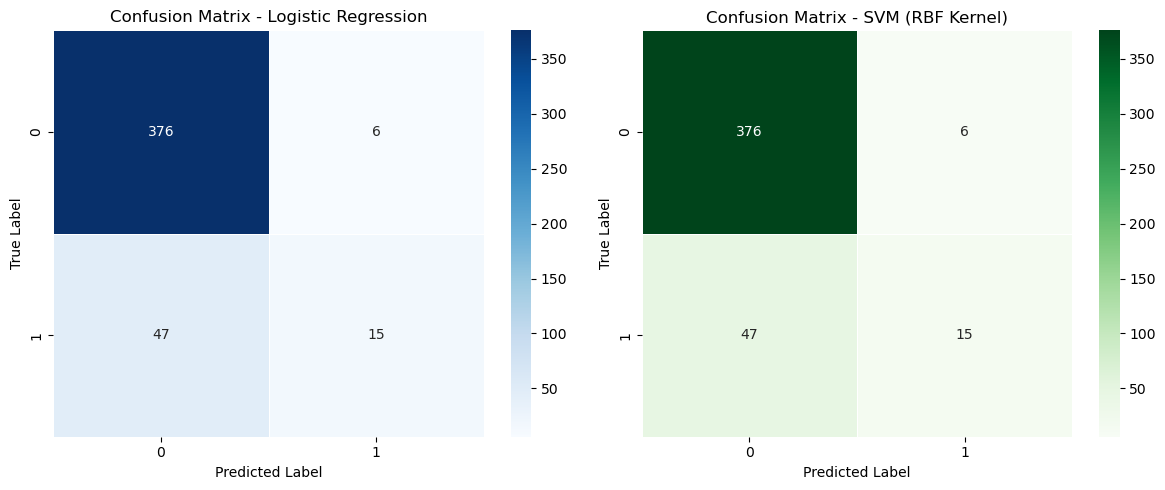

In [87]:


# Confusion Matrix for Logistic Regression Model
conf_matrix_logistic = confusion_matrix(y_test, y_pred)

# Confusion Matrix for SVM Model
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Blues", fmt="d", linewidths=.5)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plotting the confusion matrix for SVM (RBF kernel)
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svm, annot=True, cmap="Greens", fmt="d", linewidths=.5)
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


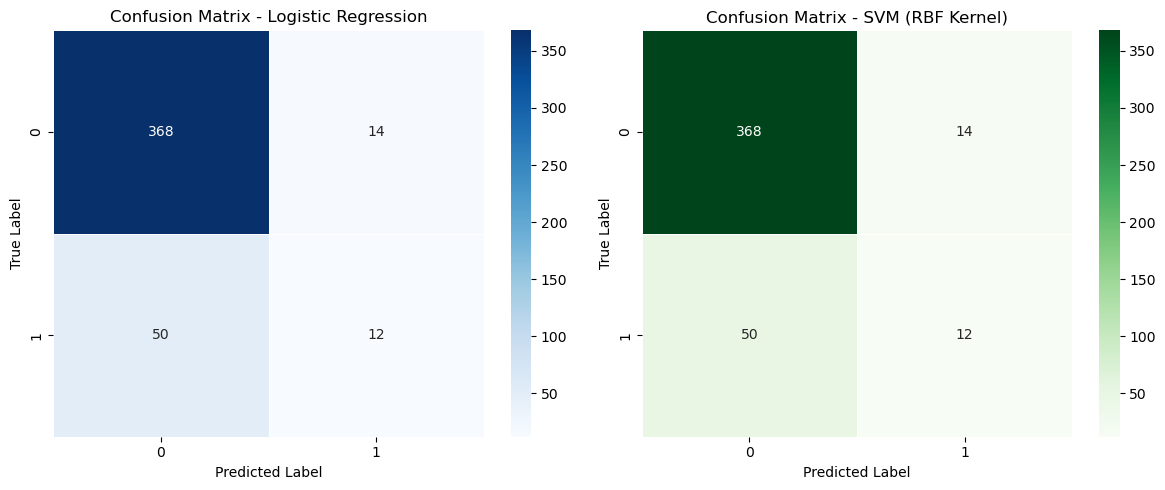

In [91]:
# Assuming 'y_logistic' and 'y_svm' are the predicted labels for logistic regression and SVM models, respectively

# Confusion Matrix for Logistic Regression Model
conf_matrix_logistic = confusion_matrix(y_test1, y_pred1)

# Confusion Matrix for SVM Model
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Blues", fmt="d", linewidths=.5)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plotting the confusion matrix for SVM (RBF kernel)
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svm, annot=True, cmap="Greens", fmt="d", linewidths=.5)
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()
